## Hidden Markov Models

In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Task 3

In [2]:
# read .npy file
rolls = np.load('rolls.npy')
print(rolls)

[[2]
 [0]
 [3]
 ...
 [1]
 [3]
 [5]]


In [3]:
X_train, X_val = train_test_split(rolls, test_size=0.5, shuffle=False)

In [4]:
# Set random seed for reproducibility
np.random.seed(13)

# Define the probabilities for a fair six-sided dice
fair_dice_prob = np.array([1/6] * 6)

# Initial state probabilities
start_prob = np.array([0.5, 0.5])

# Lists to store models and their scores
models = []
scores = []

# Create and train Hidden Markov Models (HMMs)
for i in range(10):
    # Initialize a Categorical HMM with 2 states
    model = hmm.CategoricalHMM(n_components=2, init_params='', n_iter=1000)
    
    # Set the initial state probabilities
    model.startprob_ = start_prob

    # Generate random probabilities for a loaded dice
    loaded_prob = np.random.rand(6)
    loaded_prob = loaded_prob / np.sum(loaded_prob)

    # Set emission probabilities for fair and loaded dice
    model.emissionprob_ = np.array([fair_dice_prob, loaded_prob])

    # Generate random transition matrix and normalize rows
    trans_mat = np.random.rand(2, 2)
    trans_mat = trans_mat / np.sum(trans_mat, axis=1, keepdims=True)
    model.transmat_ = trans_mat

    # Fit the model to the training data
    model.fit(X_train)
    
    # Store the trained model and its validation score
    models.append(model)
    scores.append(model.score(X_val))

# Select the best model based on validation score
best_model = models[np.argmax(scores)]

# Print the score of the best model
print('Best model score: ', scores[np.argmax(scores)])

# Predict states for the validation data using the best model
states = best_model.predict(X_val)

# Print the sequence of switching between fair and loaded dice
print('Sequence of switching between the fair and loaded die: ', states)

Best model score:  -43062.80619720299
Sequence of switching between the fair and loaded die:  [1 1 1 ... 0 0 0]


#### This corresponds to the Evaluation problem in HMMs

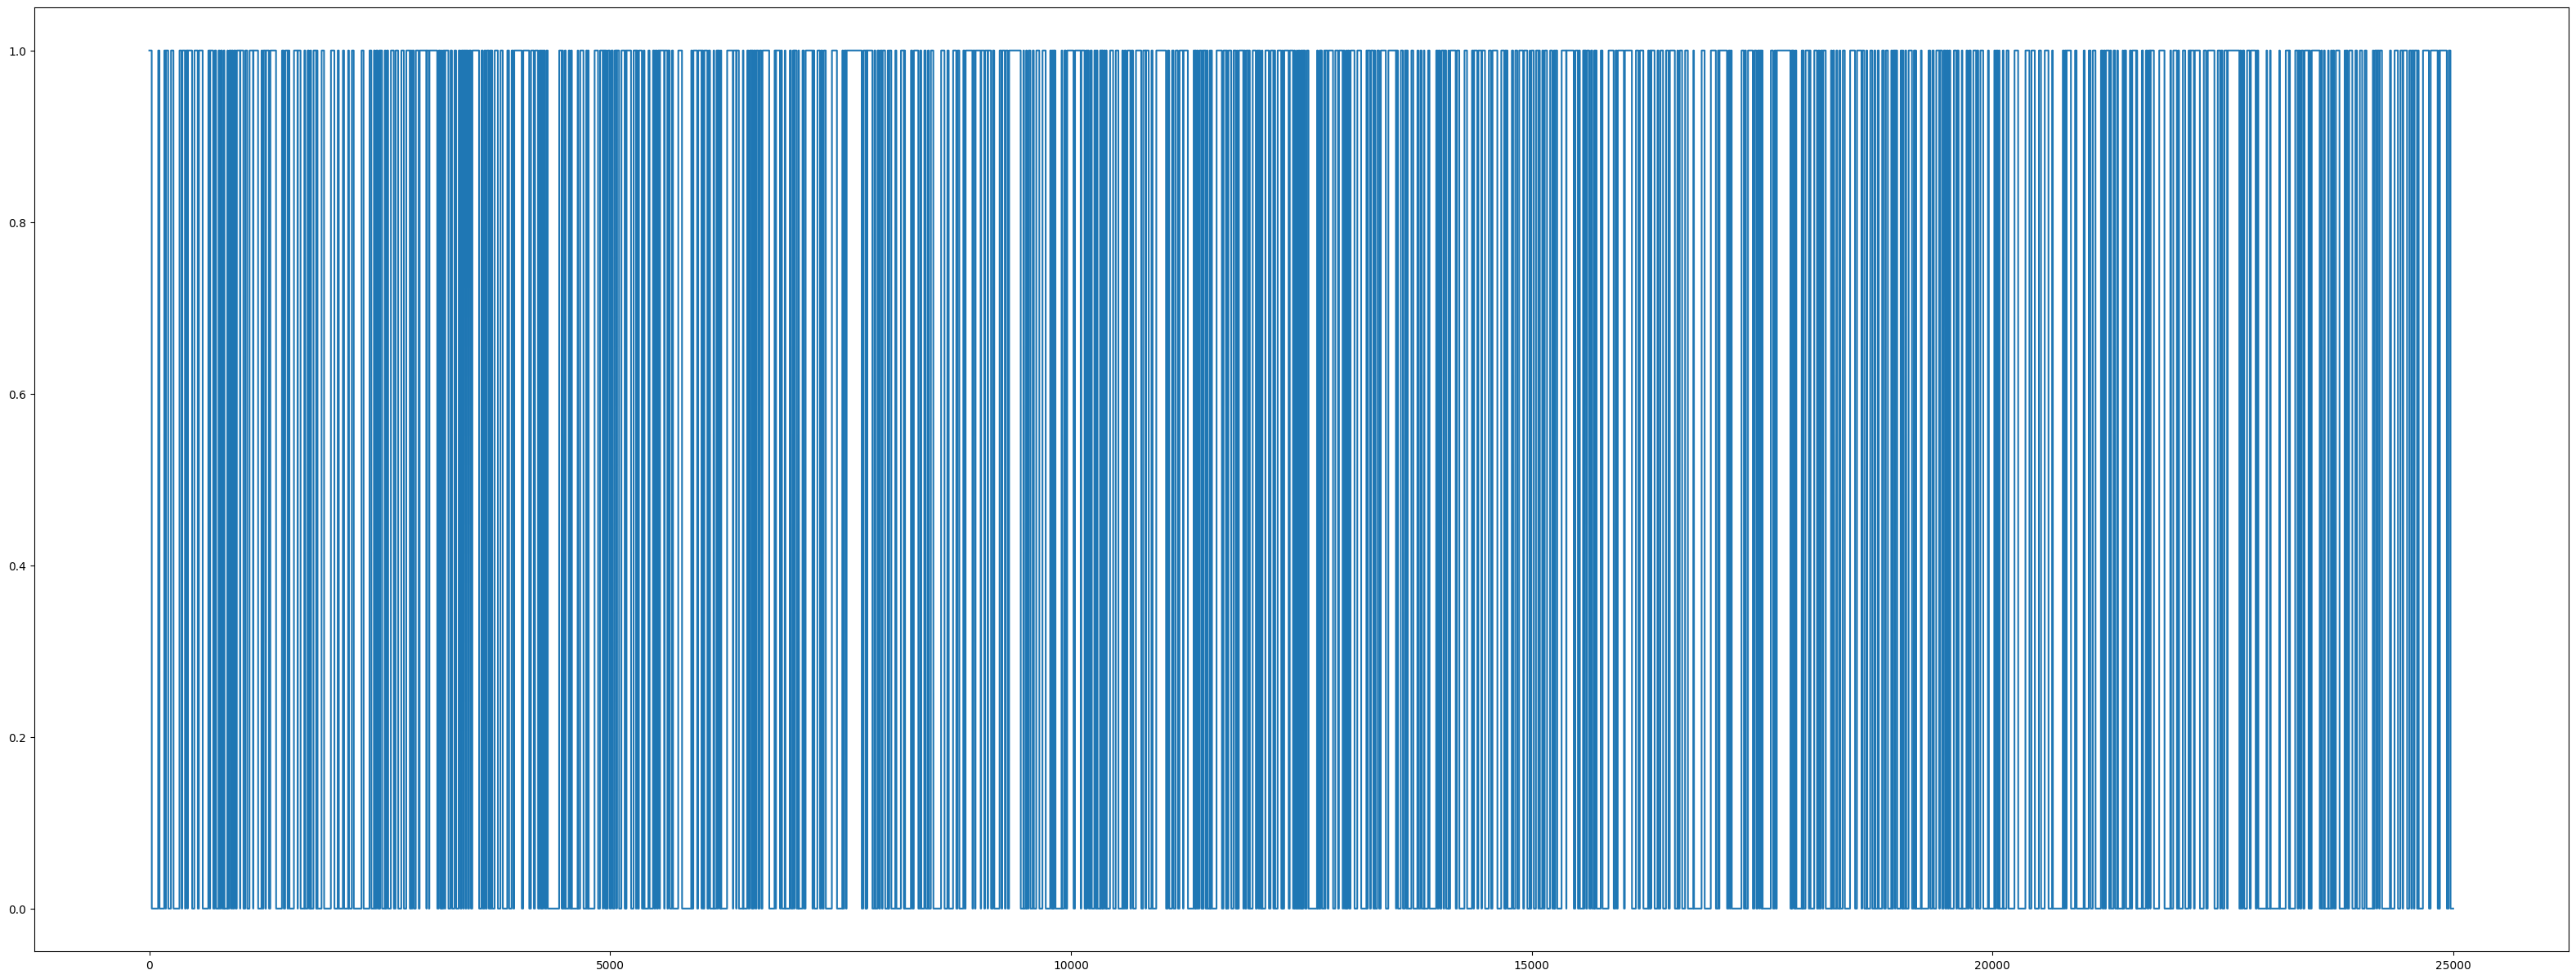

In [5]:
plt.figure(figsize=(40,15))
plt.plot(states)
plt.show()

In [6]:
print("The probability that the fair die is switched out for the loaded one: ", best_model.transmat_[0][1])
print("The probability that the loaded die is switched out for the fair one: ", best_model.transmat_[1][0])
print('Transition matrix: ')
print(best_model.transmat_)

The probability that the fair die is switched out for the loaded one:  0.18165979617925204
The probability that the loaded die is switched out for the fair one:  0.185238777421241
Transition matrix: 
[[0.8183402  0.1816598 ]
 [0.18523878 0.81476122]]


#### This corresponds to the LEARNING question in HMMs

In [7]:
print("The loaded dice probabilities from 1 to 6 respectively is: ", best_model.emissionprob_[1])

print('Loaded die is biased towards: ', np.argmax(best_model.emissionprob_[1]) + 1)

The loaded dice probabilities from 1 to 6 respectively is:  [0.17187089 0.16314268 0.17606963 0.16810604 0.17113334 0.14967742]
Loaded die is biased towards:  3


#### This corresponds to the LEARNING question in HMMs

## Task 4

In [8]:
runs = np.load('runs.npy')
print(runs)

[[1]
 [6]
 [4]
 ...
 [1]
 [6]
 [3]]


In [9]:
X_train, X_val = train_test_split(runs, test_size=0.5, shuffle=False)

In [10]:
# Initialize lists to store models and their scores
models = []
scores = []

# Set random seed for reproducibility
np.random.seed(13)

# Create and train Gaussian Hidden Markov Models (HMMs)
for i in range(10):
    # Initialize a Gaussian HMM with 2 states
    model = hmm.GaussianHMM(n_components=2, init_params='', n_iter=1000)
    
    # Set the initial state probabilities
    model.startprob_ = np.array([0.5, 0.5])

    # Generate random emission probabilities for Virat Kohli
    virat_prob = np.random.rand(7)
    virat_prob[1] += 0.5  # Virat focuses more on states 1 and 2
    virat_prob[2] += 0.5
    virat_prob[5] = 0  # Set probability of state 5 to 0
    virat_prob = virat_prob / np.sum(virat_prob)

    # Generate random emission probabilities for Rohit Sharma
    rohit_prob = np.random.rand(7)
    rohit_prob[4] += 0.5  # Rohit focuses more on states 4 and 6
    rohit_prob[6] += 0.5
    rohit_prob[5] = 0  # Set probability of state 5 to 0
    rohit_prob = rohit_prob / np.sum(rohit_prob)

    # Set emission probabilities for Virat and Rohit
    model.emissionprob_ = np.array([virat_prob, rohit_prob])

    # Set transition matrix
    model.transmat_ = np.array([[0.7, 0.3], [0.3, 0.7]])

    # Fit the model to the training data
    model.fit(X_train)
    
    # Store the trained model and its validation score
    models.append(model)
    scores.append(model.score(X_val))

# Select the best model based on validation score
best_model = models[np.argmax(scores)]

# Print the score of the best model
print('Best model score: ', scores[np.argmax(scores)])

Best model score:  -29916.657214410658


In [11]:
print("Starting state: ", best_model.startprob_)

print("Transition matrix: ")
print(best_model.transmat_)

print("Emission probabilities: ")
print(best_model.emissionprob_)

Starting state:  [2.20378863e-23 1.00000000e+00]
Transition matrix: 
[[0.55007707 0.44992293]
 [0.46857078 0.53142922]]
Emission probabilities: 
[[0.14436879 0.13691347 0.24583246 0.17927686 0.18054882 0.
  0.1130596 ]
 [0.17911763 0.1481887  0.16675922 0.00809213 0.18441198 0.
  0.31343035]]


In [12]:
states = best_model.predict(X_val)

print(states)
if(states[0] == 0):
    print("Virat starts the match")
else:
    print("Rohit starts the match")

if(states[-1] == 0):
    print("Virat ends the match")
else:
    print("Rohit ends the match")

[1 0 0 ... 1 0 0]
Rohit starts the match
Virat ends the match
